## Merge

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import os.path as op
import sweetviz as sw
from ludwig import logging
from ludwig.api import LudwigModel
from sklearn.model_selection import train_test_split

/home/bakirillov/anaconda3/envs/research/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
np.random.seed(134)

In [3]:
calories = pd.read_csv("../data/calories.csv")
excersize = pd.read_csv("../data/exercise.csv")

In [4]:
df = pd.merge(calories, excersize)

## EDA

In [5]:
my_report = sw.analyze(df)
my_report.show_html() # Default arguments will generate to "SWEETVIZ_REPORT.html"

[Step 3/3] Generating associations graph     |          | [  0%]   00:00 -> (? left)    /home/bakirillov/anaconda3/envs/research/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/bakirillov/anaconda3/envs/research/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append(pd.Series(empty_row_dict, name=feature))
/home/bakirillov/anaconda3/envs/research/lib/python3.9/site-packages/sweetviz/graph_associations.py:223: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  new_dataframe = new_dataframe.append

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## Train the model

In [6]:
df.columns

Index(['User_ID', 'Calories', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp'],
      dtype='object')

In [7]:
input_features = [
    {"name": "Duration", "type": "numerical"}
]

In [8]:
# Define the model using input features and additional parameters
model_definition = {
    "input_features": input_features,
    "output_features": [{
        "name": "Calories", "type": "numerical"
    }],
    "preprocessing": {
        "numerical": {
            "normalization": "minmax"
        }
    },
    "training": {
        "batch_size": 128,
        "decay": True,
        "decay_rate": 0.96,
        "decay_steps": 10000,
        "early_stop": 10,
        "epochs": 100,
    }
}

In [9]:
model = LudwigModel(model_definition, logging_level=logging.DEBUG)

In [10]:
train_ix, test_ix = train_test_split(np.arange(df.shape[0]))

In [11]:
train_df = df.iloc[train_ix]
test_df = df.iloc[test_ix]

In [12]:
train_stats = model.train(train_df)

Experiment name: api_experiment
Model name: run
Output directory: results/api_experiment_run


ludwig_version: '0.4.1'
command: ('/home/bakirillov/anaconda3/envs/research/lib/python3.9/site-packages/ipykernel_launcher.py '
 '-f '
 '/home/bakirillov/.local/share/jupyter/runtime/kernel-dd8ac7d0-f01b-4831-8bc5-1b314e4c1f2a.json')
random_seed: 42
data_format: "<class 'pandas.core.frame.DataFrame'>"
config: {   'combiner': {'type': 'concat'},
    'input_features': [   {   'column': 'Duration',
                              'name': 'Duration',
                              'proc_column': 'Duration_mZFLky',
                              'tied': None,
                              'type': 'numerical'}],
    'output_features': [   {   'clip': None,
                               'column': 'Calories',
                               'dependencies': [],
                               'loss': {   'type': 'mean_squared_error',
                                           'weight': 1},
                

Output numerical feature Calories
 output feature fully connected layers
  FCStack
 regressor
  Dense

╒══════════╕
│ TRAINING │
╘══════════╛


Epoch   1
Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 180.29it/s]
Took 2.2935s
╒════════════╤════════╤══════════════════════╤═══════════════════════╤═══════════════════════════╤══════════════════════════════════════╤════════╕
│ Calories   │   loss │   mean_squared_error │   mean_absolute_error │   root_mean_squared_error │   root_mean_squared_percentage_error │     r2 │
╞════════════╪════════╪══════════════════════╪═══════════════════════╪═══════════════════════════╪══════════════════════════════════════╪════════╡
│ train      │ 0.0040 │               0.0040 │                0.0443 │                    0.0629 │                             inf      │ 0.9010 │
├────────────┼────────┼──────────────────────┼───────────────────────┼───────────────────────────┼──────────────────────────────────────┼────────┤
│ vali       │ 0.0037 │        

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0035 │
├────────────┼────────┤
│ vali       │ 0.0033 │
├────────────┼────────┤
│ test       │ 0.0033 │
╘════════════╧════════╛
Validation loss on combined improved, model saved


Epoch   6
Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 1941.21it/s]
Took 0.1813s
╒════════════╤════════╤══════════════════════╤═══════════════════════╤═══════════════════════════╤══════════════════════════════════════╤════════╕
│ Calories   │   loss │   mean_squared_error │   mean_absolute_error │   root_mean_squared_error │   root_mean_squared_percentage_error │     r2 │
╞════════════╪════════╪══════════════════════╪═══════════════════════╪═══════════════════════════╪══════════════════════════════════════╪════════╡
│ train      │ 0.0035 │               0.0035 │                0.0435 │                    0.0593 │                             inf      │ 0.9120 │
├────────────┼────────┼──────────────────────┼───────

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0035 │
├────────────┼────────┤
│ vali       │ 0.0034 │
├────────────┼────────┤
│ test       │ 0.0033 │
╘════════════╧════════╛
Last improvement of combined validation loss happened 5 epochs ago


Epoch  11
Evaluation test : 100%|██████████| 18/18 [00:00<00:00, 1928.56it/s]
Took 0.1725s
╒════════════╤════════╤══════════════════════╤═══════════════════════╤═══════════════════════════╤══════════════════════════════════════╤════════╕
│ Calories   │   loss │   mean_squared_error │   mean_absolute_error │   root_mean_squared_error │   root_mean_squared_percentage_error │     r2 │
╞════════════╪════════╪══════════════════════╪═══════════════════════╪═══════════════════════════╪══════════════════════════════════════╪════════╡
│ train      │ 0.0035 │               0.0035 │                0.0436 │                    0.0593 │                             inf      │ 0.9121 │
├────────────┼────────┼─────────────

╒════════════╤════════╕
│ combined   │   loss │
╞════════════╪════════╡
│ train      │ 0.0036 │
├────────────┼────────┤
│ vali       │ 0.0033 │
├────────────┼────────┤
│ test       │ 0.0033 │
╘════════════╧════════╛
Last improvement of combined validation loss happened 10 epochs ago

EARLY STOPPING due to lack of validation improvement, it has been 10 epochs since last validation improvement

Best validation model epoch: 5
Best validation model loss on validation set combined: 0.003344629891216755
Best validation model loss on test set combined: 0.003340356983244419

Finished: api_experiment_run
Saved to: results/api_experiment_run


## Test the model

In [13]:
test_Yhat = model.predict(test_df)[0]

Preprocessing
cast columns
build metadata
build data
get split
Predicting
Prediction: 100%|██████████| 30/30 [00:00<00:00, 446.59it/s]
Postprocessing


In [14]:
from scipy.stats import spearmanr
from sklearn.metrics import mean_absolute_error

In [15]:
spearmanr(test_df["Calories"].values, test_Yhat["Calories_predictions"].values)

SpearmanrResult(correlation=0.9765694324897696, pvalue=0.0)

In [17]:
import matplotlib.pyplot as plt

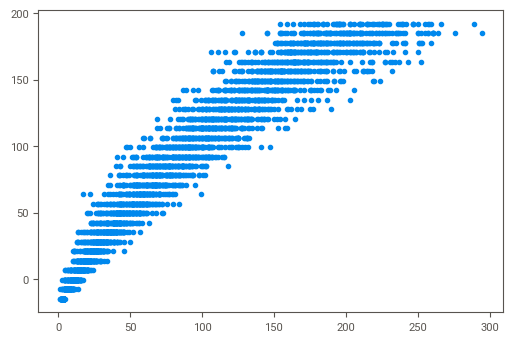

In [18]:
plt.scatter(test_df["Calories"].values, test_Yhat["Calories_predictions"].values)

In [19]:
mean_absolute_error(y_pred=test_Yhat["Calories_predictions"].values, y_true=test_df["Calories"].values)

13.475534872380893

In [20]:
model.save('trained')

## Predict

In [21]:
model = LudwigModel.load("trained")

In [22]:
d = pd.read_csv("test.csv", index_col=0)

In [23]:
Yhat = model.predict(d)[0]

In [24]:
Yhat.to_csv("predicted.csv")